# LAB03 - Arya Chandran ( 21BDA34)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
train = pd.read_csv('loan.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# DATA CLEANING

In [6]:
train.Loan_Status = train.Loan_Status.map({'Y':1, 'N':0})

In [7]:
train.sample(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,1
172,LP001586,Male,Yes,3+,Not Graduate,No,3522,0.0,81.0,180.0,1.0,Rural,0
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,1
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,0
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,0
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,1
400,LP002288,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
407,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,1


In [8]:
train.shape

(614, 13)

In [9]:
train = train.drop('Loan_ID', axis = 1)

In [10]:
train.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
321,Male,Yes,3+,Graduate,No,4342,189.0,124.0,360.0,1.0,Semiurban,1
227,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,1
474,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,1
264,Male,No,0,Graduate,Yes,5166,0.0,128.0,360.0,1.0,Semiurban,1
100,Male,Yes,2,Not Graduate,No,4288,3263.0,133.0,180.0,1.0,Urban,1
419,Male,Yes,0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Semiurban,1
424,Male,Yes,0,Graduate,No,14880,0.0,96.0,360.0,1.0,Semiurban,1
579,Male,No,0,Graduate,NaN,3182,2917.0,161.0,360.0,1.0,Urban,1
570,Male,Yes,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,1
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,1


In [11]:
train.shape

(614, 12)

In [12]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
(train.isna().sum()/train.shape[0])*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
train.drop_duplicates(inplace = True)

In [15]:
train.shape

(614, 12)

In [16]:
train.dropna(subset = ['Married'], inplace = True)

In [17]:
train.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
472,Male,Yes,3+,Graduate,No,4691,0.000000,100.0,360.0,1.0,Semiurban,1
466,Male,Yes,3+,Not Graduate,No,2947,1664.000000,70.0,180.0,0.0,Urban,0
393,Male,Yes,2,Not Graduate,No,1993,1625.000000,113.0,180.0,1.0,Semiurban,1
300,Male,Yes,0,Not Graduate,No,1800,2934.000000,93.0,360.0,0.0,Urban,0
449,Male,No,1,Not Graduate,Yes,2769,1542.000000,190.0,360.0,NaN,Semiurban,0
553,Male,Yes,0,Not Graduate,No,2454,2333.000000,181.0,360.0,0.0,Urban,0
428,Male,Yes,0,Graduate,No,2920,16.120001,87.0,360.0,1.0,Rural,1
139,Male,Yes,2,Not Graduate,No,4200,1430.000000,129.0,360.0,1.0,Rural,0
531,Male,Yes,3+,Graduate,No,4281,0.000000,100.0,360.0,1.0,Urban,1
154,Male,No,0,Graduate,No,3254,0.000000,50.0,360.0,1.0,Urban,1


In [18]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

In [19]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])

In [20]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [21]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [22]:
train['Property_Area'] = train['Property_Area'].fillna(train['Property_Area'].mode()[0])

In [23]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [24]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [25]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [27]:
train.sample(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
120,Male,Yes,0,Graduate,No,5667,2667.0,180.000000,360.0,1.0,Rural,1
582,Female,Yes,0,Graduate,No,3166,0.0,36.000000,360.0,1.0,Semiurban,1
196,Male,No,0,Graduate,No,8333,3750.0,187.000000,360.0,1.0,Rural,1
63,Male,Yes,1,Graduate,No,4945,0.0,146.369492,360.0,0.0,Rural,0
97,Male,Yes,0,Graduate,No,1977,997.0,50.000000,360.0,1.0,Semiurban,1
437,Male,Yes,0,Graduate,No,2213,1125.0,146.369492,360.0,1.0,Urban,1
575,Male,Yes,2,Graduate,No,3159,461.0,108.000000,84.0,1.0,Urban,1
151,Male,Yes,0,Graduate,Yes,2577,3750.0,152.000000,360.0,1.0,Rural,1
263,Female,No,0,Graduate,No,7200,0.0,120.000000,360.0,1.0,Rural,1
206,Female,No,0,Graduate,No,3244,0.0,80.000000,360.0,1.0,Urban,1


In [73]:
def heat_map(data,fig_size=(10,10)):

    fig, ax = plt.subplots(figsize=fig_size)
    heatmap = sns.heatmap(data,
                          square = True,
                          linewidths = .2,
                          cmap = 'YlGnBu',
                          cbar_kws = {'shrink': 0.8,'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1,
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})
    ax.set_yticklabels(data.columns, rotation = 0)
    ax.set_xticklabels(data.columns)

    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

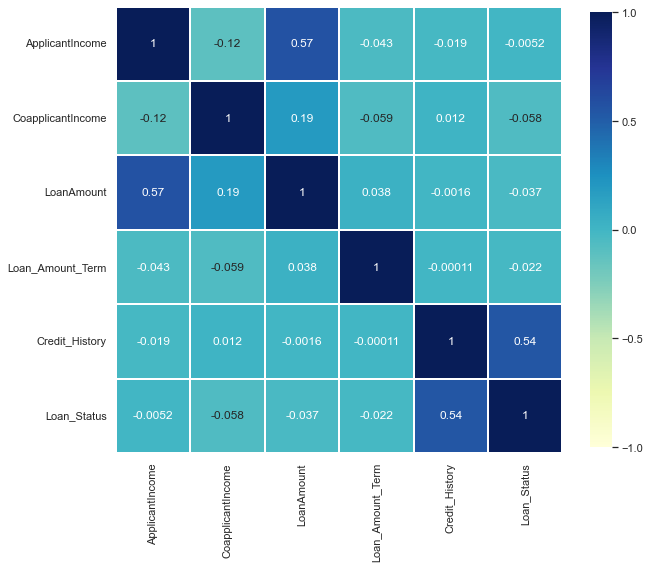

In [74]:
heat_map(train.corr())

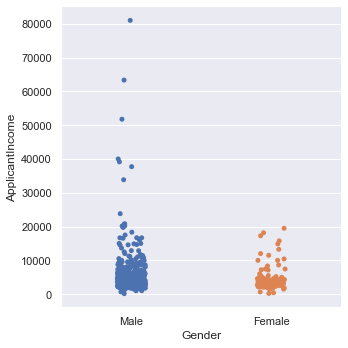

In [28]:
sns.catplot(x = 'Gender', y = 'ApplicantIncome', data = train)

From the ablove plot, we can conclude that female applicants have income less than 20000 which is less when compared to the male applicants. 

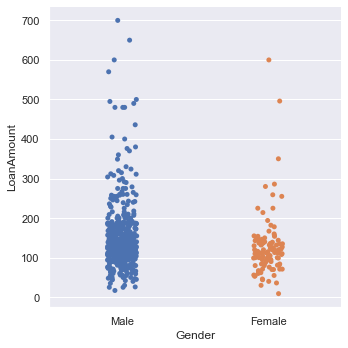

In [29]:
sns.catplot(x = 'Gender', y = 'LoanAmount', data = train)

The plot above shows that male applicants loan a bigger amount when compared to female applicants. 

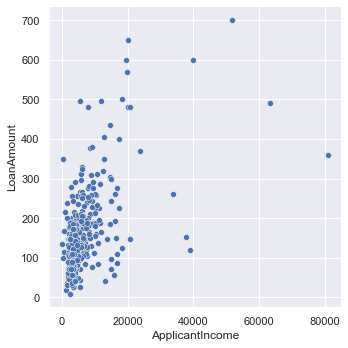

In [30]:
sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = train)

The plot indicates that majority of the applicants have income less than 20000 and most of them in that category loan amounts less than 300000. It is evident that applicants with higher income are few in number and they tend to loan huge amounts. 

In [67]:
train.groupby(['Property_Area', 'Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          0               69
               1              110
Semiurban      0               54
               1              177
Urban          0               69
               1              132
Name: Loan_Status, dtype: int64

[Text(0.5, 1.0, 'Countplot for Property_Area vs Loan_Status')]

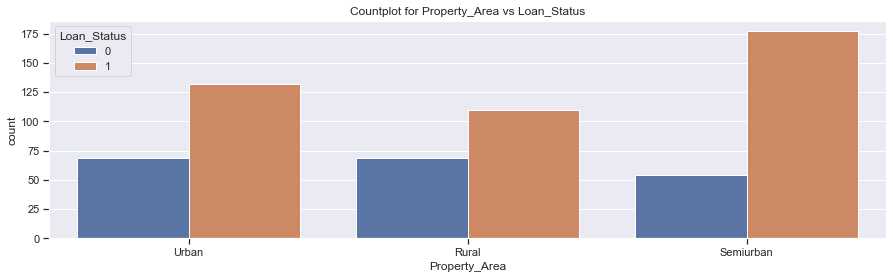

In [77]:
plt.figure(figsize=(15, 4))
sns.countplot(x="Property_Area", hue="Loan_Status", data=train).set(title ="Countplot for Property_Area vs Loan_Status")

Most of the applicants who have been granted loan are from Semi urban areas followed by Urban and Rural.

In [70]:
train.groupby(['Married', 'Loan_Status'])['Loan_Status'].count()

Married  Loan_Status
No       0               79
         1              134
Yes      0              113
         1              285
Name: Loan_Status, dtype: int64

[Text(0.5, 1.0, 'Countplot for Married vs Loan_Status')]

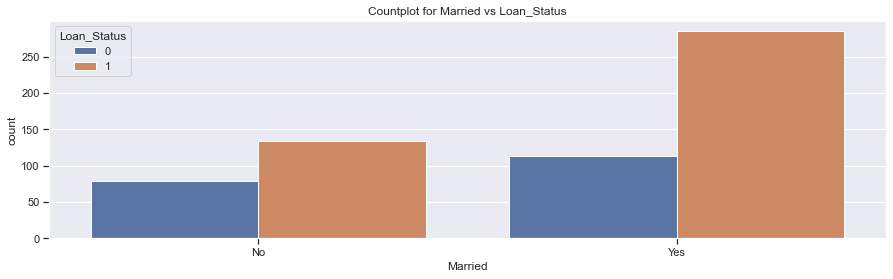

In [78]:
plt.figure(figsize=(15, 4))
sns.countplot(x="Married", hue="Loan_Status", data=train).set(title ="Countplot for Married vs Loan_Status")

Most of the applicants who have applied for a loan are married. 

Majority of the applicants who have been granted loan are married. 

# LOGISTIC REGRESSION

In [32]:
model_df = train[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']]

In [33]:
model_df_final = pd.get_dummies(data=model_df, drop_first=True)

In [34]:
model_df_final.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [35]:
X = model_df_final[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban']]
y = model_df_final['Loan_Status']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
clf = LogisticRegression(random_state=0)

In [38]:
clf.fit(X_train, y_train)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [41]:
clf.score(X_train, y_train)

0.805327868852459

In [42]:
clf.score(X_test, y_test)

0.8292682926829268

LOGISTIC REGRESSION CURVE

# EVALUATION METRICS

a) Confusion Matrix - A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Reference : https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16 19]
 [ 2 86]]


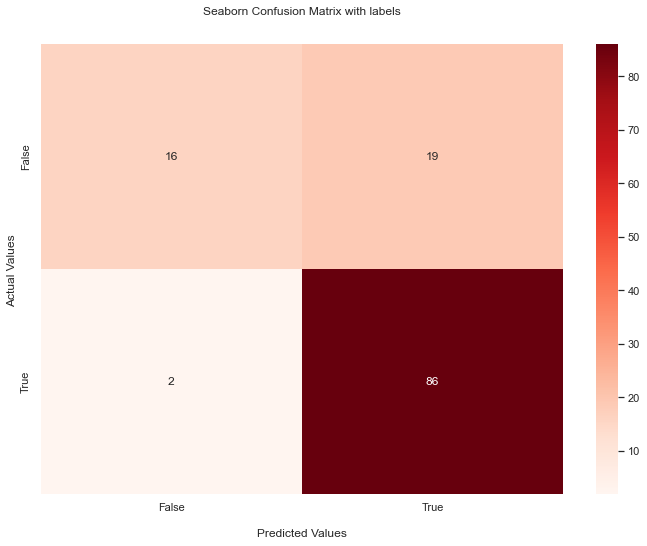

In [45]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

b) Precision - What proportion of positive identifications was actually correct?

Precision = TP / TP + FP

In [46]:
Precision = precision_score(y_test, y_pred)

In [47]:
print('Precision:', Precision)

Precision: 0.819047619047619


c) Recall - What proportion of actual positives was identified correctly?

Recall = TP / TP + FN

In [48]:
Recall = recall_score(y_test, y_pred)

In [49]:
print('Recall: ', Recall)

Recall:  0.9772727272727273


Reference : https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

d) F1-Score - The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers.

In [50]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score: {:0.2f}".format(f1))

F1 Score: 0.89


e) Sensitivity - Sensitivity is the proportion of true positives that are correctly predicted by the model (Same as Recall)

f) Specificity - Specifity is the proportion of true negatives that are correctly predicted by the model.

In [51]:
tn = 2
fp = 19

In [52]:
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.10


References : https://vitalflux.com/ml-metrics-sensitivity-vs-specificity-difference/#:~:text=In%20machine%20learning%2C%20sensitivity%20and,correctly%20predicted%20by%20the%20model.

g) Misclassification rate - It is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.

In [53]:
fn = 16
total = 123

In [54]:
MR = (fn+fp)/total
print("Misclassification Rate {:0.2f}".format(MR))

Misclassification Rate 0.28


h) ROC, AUROC

Receiver Operating Characteristic (ROC) - ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis.

In [92]:
from sklearn import metrics

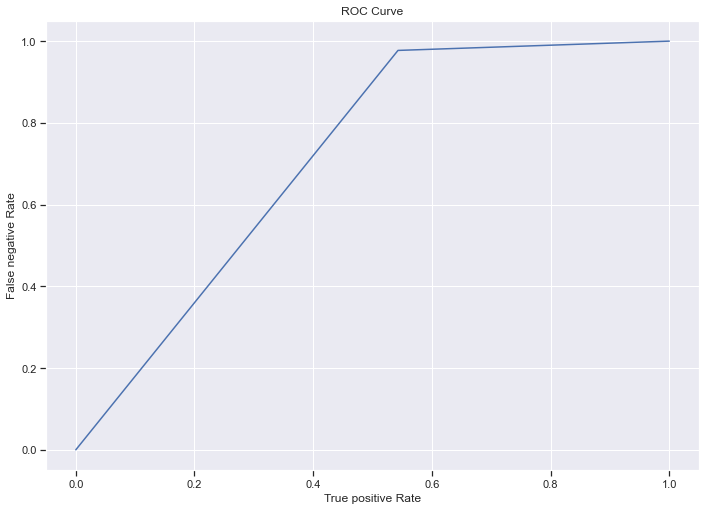

In [93]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)
plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.xlabel("True positive Rate")
plt.ylabel("False negative Rate")
plt.show()

AUROC - It is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

In [94]:
auc = metrics.roc_auc_score(y_test,y_pred)
print(auc)

0.7172077922077922
